In [0]:
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [40]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

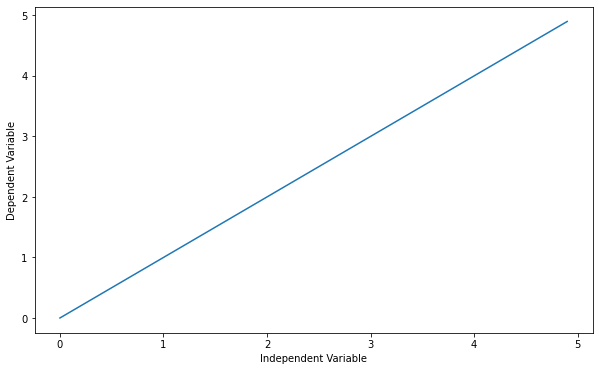

In [41]:
a = 1
b = 0

Y = a * X + b

plt.plot(X, Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [42]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-04-13 07:16:24--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2020-04-13 07:16:24 (2.76 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [43]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [0]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

In [0]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b

In [46]:
loss = tf.reduce_mean(tf.square(y - train_y))
loss

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

In [0]:
train = optimizer.minimize(loss)

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [50]:
loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
      print(step, loss_val, a_val, b_val)
      train_data.append([a_val, b_val])

0 26992.594 77.07107 46.11027
5 1891.7208 58.844624 47.595726
10 1762.724 57.65104 53.01983
15 1653.5896 56.36652 58.02392
20 1559.044 55.172848 62.682034
25 1477.1373 54.0618 67.01764
30 1406.179 53.027668 71.05308
35 1344.706 52.065136 74.80912
40 1291.4507 51.169247 78.30512
45 1245.3143 50.33538 81.55908
50 1205.345 49.559246 84.58775
55 1170.7191 48.83685 87.40674
60 1140.7214 48.164467 90.03055
65 1114.7338 47.538635 92.4727
70 1092.2203 46.956135 94.745766
75 1072.716 46.413963 96.861465
80 1055.8192 45.90933 98.83068
85 1041.181 45.439632 100.66355
90 1028.4995 45.002457 102.36953
95 1017.5135 44.595547 103.9574


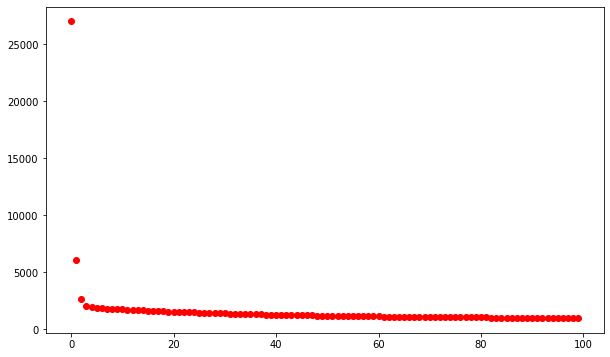

In [51]:
plt.plot(loss_values, 'ro')

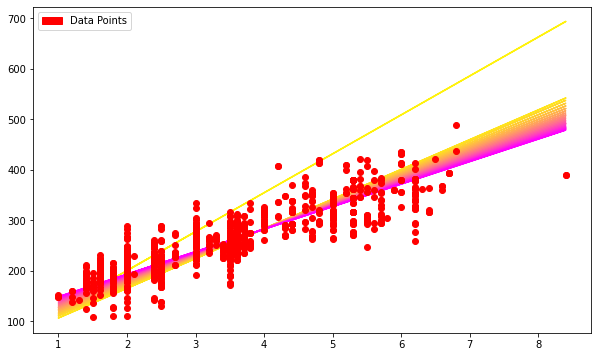

In [59]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')

green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()